<a href="https://colab.research.google.com/github/vydra-v-getrax/deep_learning/blob/main/Konovalova_alx_QuesT_Homework3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install torch
!pip install nltk
!pip install tqdm
!pip install seaborn
!pip install numpy
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Скачиваем данные

In [3]:
!wget https://raw.githubusercontent.com/semensorokin/DLforNLP_course_material/master/Homework2/answers_subsample.csv

--2023-12-06 11:54:24--  https://raw.githubusercontent.com/semensorokin/DLforNLP_course_material/master/Homework2/answers_subsample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28717126 (27M) [text/plain]
Saving to: ‘answers_subsample.csv’

answers_subsample.c 100%[===================>]  27.39M  --.-KB/s    in 0.1s    

2023-12-06 11:54:25 (240 MB/s) - ‘answers_subsample.csv’ saved [28717126/28717126]



In [4]:
# если ругается на то, что нет wget
# !apt-get install wget

In [5]:
!ls -l

total 28052
-rw-r--r-- 1 root root 28717126 Dec  6 11:54 answers_subsample.csv
drwxr-xr-x 1 root root     4096 Dec  4 14:27 sample_data


In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('answers_subsample.csv')

In [8]:
data

,category,text
0,business,Могут ли в россельхозбанке дать в залог норков...
1,law,Может ли срочник перевестись на контракт после...
2,business,Продажа недвижимости по ипотеки ? ( арестованы...
3,business,"В чем смысл криптовалюты, какая от неё выгода ..."
4,law,часть 1 статья 158 похитил телефон
...,...,...
237774,relax,елку нарядили? =)
237775,law,"Имеется переработка при 75% ставки, отгулы не ..."
237776,food,Попробовала варить рис с половиной кубика для ...
237777,food,Почему рекоменд... Почему рекомендуют есть фру...


In [9]:
data.category.value_counts() * 100 / data.shape[0]

law         29.793211
relax       22.016242
business    19.309527
food        18.367055
love        10.513965
Name: category, dtype: float64

# Предобученные эмбеддинги
[Источник](https://fasttext.cc/docs/en/crawl-vectors.html)  
Вы можете взять любые word2vec подобные эмббединги. Если вы хотите использовать elmo, bert, etc сначала попробуйте с word2vec подобными эмббедингами, а потом можете перейти к более сложным моделям.  
Ниже мы сначала скачиваем, а потом распоковываем эмбеддинги.

In [10]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz
!gzip -d cc.ru.300.vec.gz

--2023-12-06 11:54:27--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.108, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1306357571 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ru.300.vec.gz’

cc.ru.300.vec.gz    100%[===================>]   1.22G   235MB/s    in 5.1s    

2023-12-06 11:54:33 (242 MB/s) - ‘cc.ru.300.vec.gz’ saved [1306357571/1306357571]



In [11]:
!ls -l

total 4458144
-rw-r--r-- 1 root root   28717126 Dec  6 11:54 answers_subsample.csv
-rw-r--r-- 1 root root 4536408847 Jan 18  2019 cc.ru.300.vec
drwxr-xr-x 1 root root       4096 Dec  4 14:27 sample_data


In [12]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from tqdm import tqdm

In [13]:
# потом можете добавить свою предобработку

def process_text(text):

    words = wordpunct_tokenize(text.lower())

    return words

In [33]:
from nltk.corpus import stopwords
import re
# nltk.download('stopwords')
STOPWORDS = stopwords.words('russian')
# print(STOPWORDS)
def process_text(text):

    words = wordpunct_tokenize(text.lower())
    words = [w for w in words if w not in STOPWORDS]
    words = [w for w in words if not re.search("[^А-яЁё]+", w)]
    return words

process_text("Hello world! Могут ли дать залог в россельхозбанке3 за норвое шубо?")

['могут', 'дать', 'залог', 'норвое', 'шубо']

In [34]:
word2freq = {}
lengths = []

for text in tqdm(data.text):

    words = process_text(text)

    lengths.append(len(words))

    for word in words:

        if word in word2freq:
            word2freq[word] += 1
        else:
            word2freq[word] = 1

100%|██████████| 237779/237779 [00:09<00:00, 26113.95it/s]


In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

<ipython-input-36-71ec2d8d2434>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lengths)


<Axes: title={'center': 'Распределение длин слов в текстах'}, xlabel='Длина предложения', ylabel='Доля'>

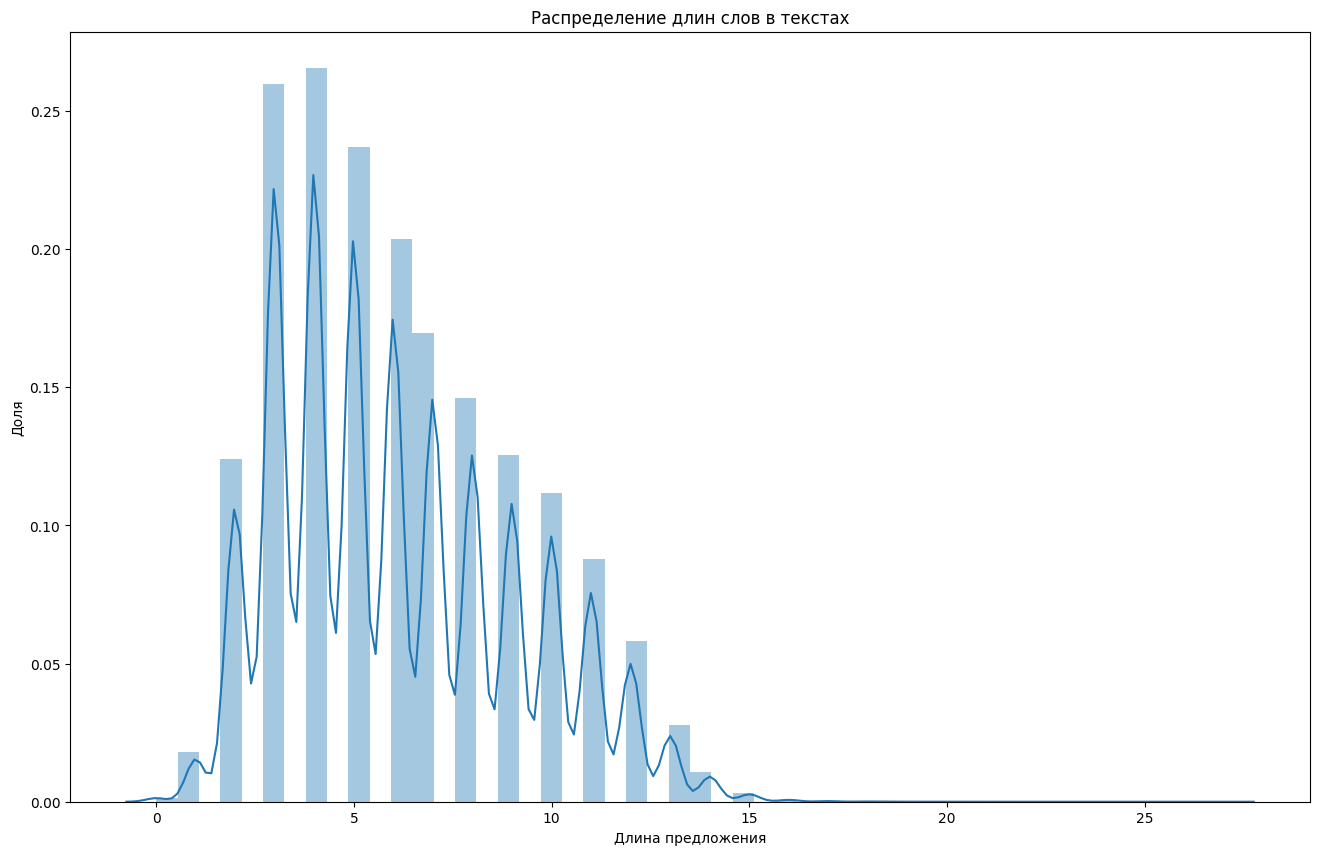

In [36]:
plt.figure(figsize=(16, 10))
plt.title('Распределение длин слов в текстах')
plt.xlabel('Длина предложения')
plt.ylabel('Доля')
sns.distplot(lengths)

In [37]:
upper_threshold = 32
lower_threshold = 3

correct_percent = len([sent_len for sent_len in lengths
                       if sent_len <= upper_threshold and sent_len >= lower_threshold]) * 100 / len(lengths)

'{:.2f} % наших текстов входят в промежуток от {} до {} слов'.format(correct_percent, lower_threshold, upper_threshold)

'92.25 % наших текстов входят в промежуток от 3 до 32 слов'

In [38]:
len(word2freq)

137971

In [39]:
'{} слов, которые встречались 3 и менее раз'.format(len([word for word in word2freq if word2freq[word] <= 3]))

'102124 слов, которые встречались 3 и менее раз'

# Читаем файл с эмбеддингами
### Этот файл с 300 числами для 2 000 000 слов и он может не влезть в память
Поэтому прочитаем только те слова, которые мы знаем

In [40]:
import numpy as np

In [41]:
word2index = {'PAD': 0}
vectors = []

word2vec_file = open('cc.ru.300.vec')


n_words, embedding_dim = word2vec_file.readline().split()
n_words, embedding_dim = int(n_words), int(embedding_dim)

# Zero vector for PAD
vectors.append(np.zeros((1, embedding_dim)))

progress_bar = tqdm(desc='Read word2vec', total=n_words)

while True:

    line = word2vec_file.readline().strip()

    if not line:
        break

    current_parts = line.split()

    current_word = ' '.join(current_parts[:-embedding_dim])

    if current_word in word2freq:

        word2index[current_word] = len(word2index)

        current_vectors = current_parts[-embedding_dim:]
        current_vectors = np.array(list(map(float, current_vectors)))
        current_vectors = np.expand_dims(current_vectors, 0)

        vectors.append(current_vectors)

    progress_bar.update(1)

progress_bar.close()

word2vec_file.close()

vectors = np.concatenate(vectors)

Read word2vec: 100%|██████████| 2000000/2000000 [01:13<00:00, 27203.40it/s]


In [42]:
len(word2index)

110367

In [43]:
unk_words = [word for word in word2freq if word not in word2index]
unk_counts = [word2freq[word] for word in unk_words]
n_unk = sum(unk_counts) * 100 / sum(list(word2freq.values()))

sub_sample_unk_words = {word: word2freq[word] for word in unk_words}
sorted_unk_words = list(sorted(sub_sample_unk_words, key=lambda x: sub_sample_unk_words[x], reverse=True))

print('Мы не знаем {:.2f} % слов в датасете'.format(n_unk))
print('Количество неизвестных слов {} из {}, то есть {:.2f} % уникальных слов в словаре'.format(
    len(unk_words), len(word2freq), len(unk_words) * 100 / len(word2freq)))
print('В среднем каждое встречается {:.2f} раз'.format(np.mean(unk_counts)))
print()
print('Топ 5 невошедших слов:')

for i in range(5):
    print(sorted_unk_words[i], 'с количеством вхождениий -', word2freq[sorted_unk_words[i]])

Мы не знаем 2.21 % слов в датасете
Количество неизвестных слов 27605 из 137971, то есть 20.01 % уникальных слов в словаре
В среднем каждое встречается 1.17 раз

Топ 5 невошедших слов:
дошик с количеством вхождениий - 43
егрн с количеством вхождениий - 41
слайм с количеством вхождениий - 39
внп с количеством вхождениий - 37
девчин с количеством вхождениий - 36


Удалилось очень много неизвестных слов (в основном после предобработки)

# Потеря 2.5 % слов в датасете
Эта ситуация не то, чтобы сильно плохая, в учебных целях нормально, к тому же в среднем они редко встречаются. Вы можете поиграть с предобработкой.

In [44]:
import torch

- 128 - размер батча
- 64 - количество слов
- 1024 - эмбеддинг слова

In [49]:
x = torch.rand(128, 64, 1024)

In [50]:
lstm = torch.nn.LSTM(1024, 512, batch_first=True)

In [51]:
%%timeit

pred = lstm(x)

830 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# А что GPU?

In [45]:
print('Доступна ли видеокарта:', torch.cuda.is_available())
print('Если недоступна, поменяйте runtime, если в колабе')

Доступна ли видеокарта: True
Если недоступна, поменяйте runtime, если в колабе


In [46]:
# универсальных способ задать device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# если доступна gpu, то давайте ее использовать, но в этом задании должны использовать

In [53]:
# перенесли x на gpu
x_gpu = x.to(device)

In [54]:
# зададим lstm на gpu
lstm_gpu = torch.nn.LSTM(1024, 512, batch_first=True)
lstm_gpu = lstm_gpu.to(device)

In [55]:
%%timeit

pred = lstm_gpu(x_gpu)

The slowest run took 18.08 times longer than the fastest. This could mean that an intermediate result is being cached.
9.17 ms ± 9.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# У меня на 1070 TI скорость уменьшилась с 381мс до 41мс, то есть в 9.29 раз

In [ ]:
# если у нас модель на гпу, а то, что мы туда подаем нет, то работать не будет
# справедлива и обратная ситуация

# выскочит ошибка
# посмотрите на нее, возможно, вы еще встретитесь
# pred = lstm_gpu(x)

# Важные и не очень интуитивные моменты про LSTM и CNN в торче

По умолчанию LSTM принимает данные с такой размерностью:
```python
(seq_len, batch, input_size)
```
Сделано это с целью оптимизации на более низком уровне.  
Мы оперируем такими объектами:
```python
(batch, seq_len, input_size)
```
Чтобы LSTM у нас заработала правильно, мы можем либо передать параметр ```batch_first=True``` во время инициализации слоя,
либо транспонировать (поменять) первую и вторую размерность у нашего x перед подачей в слой.  
[Подробнее про LSTM](https://pytorch.org/docs/stable/nn.html#lstm)

- 128 - размер батча
- 64 - количество слов
- 1024 - эмбеддинг слова

In [56]:
# первый способ
lstm = torch.nn.LSTM(1024, 512, batch_first=True)

pred, mem = lstm(x)

In [57]:
pred.shape

torch.Size([128, 64, 512])

In [58]:
lstm = torch.nn.LSTM(1024, 512)

# меняем размерность batch и seq_len местами
x_transposed = x.transpose(0, 1)
pred_transposed, mem = lstm(x_transposed)

In [59]:
# у нас все еще осталась размерность (seq_len, batch, input_size)
pred_transposed.shape

torch.Size([64, 128, 512])

In [60]:
# просто транспонируем еще раз
pred = pred_transposed.transpose(0, 1)
pred.shape

torch.Size([128, 64, 512])

## Conv1d & MaxPool1d
Примерно такая же ситуация происходит со сверточными слоями и пулингами.  
1d реализация как раз для текстов, в ней матрица-фильтр ходит только по одной размерности.  
[Подробнее про CNN](https://pytorch.org/docs/stable/nn.html#conv1d)  
[Подробнее про пулинг](https://pytorch.org/docs/stable/nn.html#maxpool1d)  
Ожидается такая размерность:
```python
(batch, input_size, seq_len)
```
Мы все еще хоти подавать такую размерность:
```python
(batch, seq_len, input_size)
```
В случае со свертками и пулингами у нас есть вариант только транспонировать x перед подачей и транспонировать полученный результат. Обратите внимание, что транспонируем мы первую и вторую размерность (индексация с нуля).

In [ ]:
x.shape

torch.Size([128, 64, 1024])

- 128 - размер батча
- 64 - количество слов
- 1024 - эмбеддинг слова

In [61]:
# in_channels - размер входных эмбеддингов
# out_channels - количество/какой размер эмбеддингов мы хотим получить
# kernel_size - размер окна/н-граммы
cnn = torch.nn.Conv1d(in_channels=1024, out_channels=512, kernel_size=3)

In [ ]:
# выпадет ошибка, посмотрите какая
# pred = cnn(x)

In [62]:
x_transposed = x.transpose(1, 2)
x_transposed.shape
# перевели в (batch, input_size, seq_len)

torch.Size([128, 1024, 64])

In [63]:
pred_transposed = cnn(x_transposed)
pred_transposed.shape
# осталась разрмерность (batch, output_size, seq_len)

torch.Size([128, 512, 62])

In [64]:
# переведем обратно в (batch, seq_len, input_size)
pred = pred_transposed.transpose(1, 2)
pred.shape

torch.Size([128, 62, 512])

# Подготовим данные в DataLoader

In [65]:
from torch.utils.data import Dataset, DataLoader

In [66]:
'UNK' in word2index

False

In [67]:
data.head()

,category,text
0,business,Могут ли в россельхозбанке дать в залог норков...
1,law,Может ли срочник перевестись на контракт после...
2,business,Продажа недвижимости по ипотеки ? ( арестованы...
3,business,"В чем смысл криптовалюты, какая от неё выгода ..."
4,law,часть 1 статья 158 похитил телефон


# Замапим категории в индексы

In [68]:
cat_mapper = {cat: n for n, cat in enumerate(data.category.unique())}

In [69]:
cat_mapper

{'business': 0, 'law': 1, 'love': 2, 'relax': 3, 'food': 4}

In [70]:
data.category = data.category.map(cat_mapper)

# Читалка данных

## Что происходит ниже
1. Мы задаем x_data, y_data (таргеты), word2index (маппер из слова в индекс слова), sequence_length (максимальная длина последовательности, если больше, ограничить ею), pad_token (токен паддинга и задаем его индекс pad_index).
1. Загружаем данные:
    1. Проходимся по датасету
    1. Предобрабатываем каждый текст в датасете
    1. Индексируем его
    1. Паддим до нужной длины
1. Когда нам нужно достать пример из датасета мы берем индексированный ```x``` и соответствующий этому индексу ```y```, наш ```x``` также паддим (или ограничиваем длину) и переводим в ```torch.Tensor(x).long()```. Для ```y``` этого делать не потребуется, в dataloader'е таргеты преобразуются в тензор сами.


In [89]:
class WordData(Dataset):

    def __init__(self, x_data, y_data, word2index, sequence_length=32, pad_token='PAD', verbose=True):

        super().__init__()

        self.x_data = []
        self.y_data = y_data

        self.word2index = word2index
        self.sequence_length = sequence_length

        self.pad_token = pad_token
        self.pad_index = self.word2index[self.pad_token]

        self.load(x_data, verbose=verbose)

    @staticmethod
    # def process_text(text):

    #     # Место для вашей предобработки

    #     words = wordpunct_tokenize(text.lower())
    #     #words = re.findall('[a-яА-ЯеЁ]+', text.lower())
    #     return words
    def process_text(text):
        words = wordpunct_tokenize(text.lower())
        words = [w for w in words if w not in STOPWORDS]
        words = [w for w in words if not re.search("[^А-яЁё]+", w)]
        return words


    def load(self, data, verbose=True):

        data_iterator = tqdm(data, desc='Loading data', disable=not verbose)

        for text in data_iterator:

            words = self.process_text(text)

            indexed_words = self.indexing(words)

            self.x_data.append(indexed_words)

    def indexing(self, tokenized_text):

        # здесь мы не используем токен UNK, потому что мы его специально не учили
        # становится непонятно какой же эмбеддинг присвоить неизвестному слову,
        # поэтому просто выбрасываем наши неизветсные слова

        return [self.word2index[word] for word in tokenized_text if word in self.word2index]

    def padding(self, sequence):

        # Ограничить длину self.sequence_length
        # если длина меньше максимально - западить
        if len(sequence)< self.sequence_length:
          add_pad = self.sequence_length - len(sequence)
          return sequence+[self.pad_index]*add_pad
        else:
          return sequence[:self.sequence_length]

    def __len__(self):

        return len(self.x_data)

    def __getitem__(self, idx):

        x = self.x_data[idx]
        x = self.padding(x)
        x = torch.Tensor(x).long()

        y = self.y_data[idx]

        return x, y

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [98]:
x_train, x_validation, y_train, y_validation = train_test_split(data.text, data.category, test_size=0.1)

train_dataset = WordData(list(x_train), list(y_train), word2index)
train_loader = DataLoader(train_dataset, batch_size=64)

validation_dataset = WordData(list(x_validation), list(y_validation), word2index)
validation_loader = DataLoader(validation_dataset, batch_size=64)

Loading data: 100%|██████████| 23778/23778 [00:00<00:00, 27528.67it/s]


In [99]:
for x, y in train_loader:
    break

In [100]:
x

tensor([[  140, 30988,  2335,  ...,     0,     0,     0],
        [  509, 18560,  1350,  ...,     0,     0,     0],
        [37807,     0,     0,  ...,     0,     0,     0],
        ...,
        [71688,    42,  8253,  ...,     0,     0,     0],
        [ 3520, 30804,  1553,  ...,     0,     0,     0],
        [21627,   226,  6326,  ...,     0,     0,     0]])

In [101]:
y

tensor([3, 0, 3, 1, 3, 3, 1, 1, 4, 4, 0, 3, 0, 3, 4, 1, 1, 0, 0, 0, 0, 1, 2, 2,
        2, 4, 0, 1, 1, 1, 4, 1, 0, 1, 3, 0, 1, 4, 4, 1, 1, 2, 1, 0, 4, 3, 0, 2,
        0, 4, 4, 0, 2, 0, 3, 0, 3, 3, 3, 0, 1, 0, 3, 0])

# Обучить нейронку

In [102]:
from math import sqrt

class model_with_att(torch.nn.Module):
  def __init__(self, matrix_w, n, input_size=512, hidden_size=384, batch_size=128): #n - количетсво категорий

        super().__init__()

        self.n = n
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.batch_size = batch_size
        # self.seq_len =

        self.emb_layer = torch.nn.Embedding.from_pretrained(torch.Tensor(matrix_w))

        self.LSTM = torch.nn.LSTM(torch.Tensor(matrix_w).shape[1], batch_size*2, batch_first=True, num_layers=2, dropout=0.1, bidirectional=True) # задайте лстм, можно 2 уровня, лучше бидирекциональный, в доке торча есть инофрмация как это сделать в одну строчку

        self.q_proj = torch.nn.Linear(in_features=input_size, out_features=batch_size*2, bias=True)# три линейных преобразования, размерность совпадает с выходом из лстм (если БИлстм то надо умножить ее на 2)
        self.k_proj = torch.nn.Linear(in_features=input_size, out_features=batch_size*2, bias=True)
        self.v_proj = torch.nn.Linear(in_features=input_size, out_features=batch_size*2, bias=True)

        self.att_soft = torch.nn.Softmax(dim = 2)

        self.cnn_3gr = torch.nn.Conv1d(in_channels=batch_size*2,
                               out_channels=batch_size,
                               kernel_size=(3,),
                               stride=(1,))# три конволюционных фильтра с разными ядрами (3,4,5) чтобы были всякие нграммы ловить
        self.cnn_4gr = torch.nn.Conv1d(in_channels=batch_size*2,
                               out_channels=batch_size,
                               kernel_size=(4,),
                               stride=(1,))
        self.cnn_5gr = torch.nn.Conv1d(in_channels=batch_size*2,
                               out_channels=batch_size,
                               kernel_size=(5,),
                               stride=(1,))

        self.linear_1 = torch.nn.Linear(in_features=hidden_size, out_features=batch_size*2, bias=True)# сверху накидываем два полносвязных слоя для классификации
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=batch_size*2, out_features=n, bias=True)


  def forward(self, x):
      x_emb = self.emb_layer(x) #примените эмбеддинги
      # транспонируйте тензор для лстм как было описано выше
      x_emb = x_emb.transpose(0, 1)
      x, _ = self.LSTM(x_emb) # применим лстм, не забываем что на выходе у него много всяких последовательностей, нам нужна только эта
      # транспонируйте обратно
      x = x.transpose(0, 1)
      # print('emb passed')
      x_q = self.q_proj(x) #применим линейные преобразования для селф-эттеншена
      x_k = self.k_proj(x)
      x_v = self.v_proj(x)
      # print('q,k, v passed')
      k_transposed = x_k.transpose(1, 2)
      att_scores = torch.bmm(k_transposed, x_q) / sqrt(x.shape[1])
      # посмотрите в презентацию и перемножьте нужные тензора изспольуя функцию bmm из торча, перед этим одну из матриц обзательно транспонируйте
      # результат обязательно поделите на корень из последней размерности (то есть на рземер эмбеддинга из предыдущего слоя)
      att_dist = self.att_soft(att_scores) # накидываем софтмакс
      attention_vectors = torch.bmm(att_dist, x_v.transpose(1, 2))# тут тоже что то с чем то нужно перемножить :
      # print('score passed')
      x_att = attention_vectors#.transpose(2,1) #транспонируем для конфолючионнах фильтров

      x_cnn3 = self.cnn_3gr(x_att)
      x_cnn4 = self.cnn_4gr(x_att)
      x_cnn5 = self.cnn_5gr(x_att)

      frst, _ =  x_cnn3.max(dim= -1,) # cделаем макс пуллинг
      sc, _ = x_cnn4.max(dim= -1,)
      thr, _ = x_cnn5.max(dim= -1,)

      x_cat = torch.cat((frst, sc, thr), dim=-1) # а теперь объединим результаты
      # print('before linear')
      x = self.linear_1(x_cat)# пару полносвязных слоев с релу для классификации
      x = self.relu(x)
      x = self.linear_2(x)

      return x

In [104]:
n_classes = data.category.unique().shape[0]

In [105]:
model = model_with_att(vectors, n_classes)

In [106]:
model #если сделать batch_first=True, то можно не транспонировать батчи

model_with_att(
  (emb_layer): Embedding(110367, 300)
  (LSTM): LSTM(300, 256, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (q_proj): Linear(in_features=512, out_features=256, bias=True)
  (k_proj): Linear(in_features=512, out_features=256, bias=True)
  (v_proj): Linear(in_features=512, out_features=256, bias=True)
  (att_soft): Softmax(dim=2)
  (cnn_3gr): Conv1d(256, 128, kernel_size=(3,), stride=(1,))
  (cnn_4gr): Conv1d(256, 128, kernel_size=(4,), stride=(1,))
  (cnn_5gr): Conv1d(256, 128, kernel_size=(5,), stride=(1,))
  (linear_1): Linear(in_features=384, out_features=256, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=256, out_features=5, bias=True)
)

In [107]:
with torch.no_grad():
    pred = model(x)

In [108]:
pred.shape

torch.Size([64, 5])

In [109]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [110]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters())

model = model.to(device)
criterion = criterion.to(device)

In [85]:
epochs = 10
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):

    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []

    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

    model.train()

    for x, y in train_loader:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        pred = model(x)
        loss = criterion(pred, y)

        loss.backward()

        optimizer.step()

        train_losses.append(loss.item())
        losses.append(loss.item())

        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])

    progress_bar.close()

    model.eval()

    for x, y in validation_loader:

        x = x.to(device)

        with torch.no_grad():

            pred = model(x)

            pred = pred.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion(pred, y)

            test_losses.append(loss.item())

    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)

    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))

    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break

Epoch 1: 100%|██████████| 214001/214001 [01:20<00:00, 2666.86it/s, train_loss=0.586]



Losses: train - 0.741, test - 0.540
F1 test - 0.804


Epoch 2: 100%|██████████| 214001/214001 [01:17<00:00, 2759.90it/s, train_loss=0.5]



Losses: train - 0.513, test - 0.492
F1 test - 0.821


Epoch 3: 100%|██████████| 214001/214001 [01:21<00:00, 2623.88it/s, train_loss=0.476]



Losses: train - 0.481, test - 0.481
F1 test - 0.823


Epoch 4: 100%|██████████| 214001/214001 [01:18<00:00, 2711.04it/s, train_loss=0.458]



Losses: train - 0.460, test - 0.479
F1 test - 0.823


Epoch 5: 100%|██████████| 214001/214001 [01:19<00:00, 2693.37it/s, train_loss=0.44]



Losses: train - 0.442, test - 0.478
F1 test - 0.825


Epoch 6: 100%|██████████| 214001/214001 [01:19<00:00, 2695.27it/s, train_loss=0.419]



Losses: train - 0.422, test - 0.481
F1 test - 0.825
Early stopping


Без дополнительной предобработки получилось 0.825. Сравнимо ли с 0.841? мда, но ниже все равно.


Добавила предобработку (удаление стоп-слов и чистку от мусора):

In [111]:
epochs = 10
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):

    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []

    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

    model.train()

    for x, y in train_loader:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        pred = model(x)
        loss = criterion(pred, y)

        loss.backward()

        optimizer.step()

        train_losses.append(loss.item())
        losses.append(loss.item())

        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])

    progress_bar.close()

    model.eval()

    for x, y in validation_loader:

        x = x.to(device)

        with torch.no_grad():

            pred = model(x)

            pred = pred.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion(pred, y)

            test_losses.append(loss.item())

    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)

    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))

    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break

Epoch 1: 100%|██████████| 214001/214001 [01:15<00:00, 2820.72it/s, train_loss=0.571]



Losses: train - 0.718, test - 0.567
F1 test - 0.796


Epoch 2: 100%|██████████| 214001/214001 [01:17<00:00, 2757.03it/s, train_loss=0.49]



Losses: train - 0.513, test - 0.507
F1 test - 0.817


Epoch 3: 100%|██████████| 214001/214001 [01:18<00:00, 2730.55it/s, train_loss=0.467]



Losses: train - 0.482, test - 0.496
F1 test - 0.822


Epoch 4: 100%|██████████| 214001/214001 [01:18<00:00, 2712.09it/s, train_loss=0.45]



Losses: train - 0.464, test - 0.487
F1 test - 0.825


Epoch 5: 100%|██████████| 214001/214001 [01:19<00:00, 2705.66it/s, train_loss=0.432]



Losses: train - 0.446, test - 0.488
F1 test - 0.826
Early stopping


Качество выросло на одну тысячную!

Если вы запускаете много раз колаб окна и ткдм начинает беситься, можно запустить окно ниже, ткдм обновится и все снова станет хорошо

In [146]:
for instance in list(tqdm._instances):
    tqdm._decr_instances(instance)

Качество получилось сравнимое, но хуже, чем 0.841. На одном из вариантов препроцессинга максимально получалось - 0.832 🤔


In [124]:
x

tensor([[29417,     0,     0,  ...,     0,     0,     0],
        [40149,     0,     0,  ...,     0,     0,     0],
        [ 1158, 62996,  5996,  ...,     0,     0,     0],
        ...,
        [  912, 82488, 44088,  ...,     0,     0,     0],
        [ 1398, 29841,  1244,  ...,     0,     0,     0],
        [ 4929,    16,  5490,  ...,     0,     0,     0]], device='cuda:0')

In [117]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
# % matplotlib inline

tokenizer_path = 'cointegrated/rubert-tiny'
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained(tokenizer_path)

tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

In [118]:
sent = data.text[0]
encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [119]:
encoded_dict

{'input_ids': tensor([[    2,   292, 20341,   751, 10632,   314,  8918, 21665,  1090, 21244,
         10934,  1550,   791,  1348,   314, 20839,  5054,  1363, 28299,  7546,
           336, 12875, 26662, 20952,   988,   705,  9354, 29418,  3689,     3,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [154]:
class WordData(Dataset):

    def __init__(self, x_data, y_data, sequence_length=32, pad_token='PAD', verbose=True):

        super().__init__()

        self.x_data = []
        self.y_data = y_data

        # self.word2index = word2index
        # self.sequence_length = sequence_length

        # self.pad_token = pad_token
        # self.pad_index = self.word2index[self.pad_token]

        self.load(x_data, verbose=verbose)


    def load(self, data, verbose=True):

        data_iterator = tqdm(data, desc='Loading data', disable=not verbose)

        for text in data_iterator:

            indexed_words = tokenizer.encode_plus(
                            text,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = 64,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                    )['input_ids'][0]

            self.x_data.append(indexed_words)

    def __len__(self):

        return len(self.x_data)

    def __getitem__(self, idx):

        x = self.x_data[idx]
        # x = self.padding(x)
        x = torch.Tensor(x).long()

        y = self.y_data[idx]

        return x, y

In [155]:
x_train, x_validation, y_train, y_validation = train_test_split(data.text, data.category, test_size=0.1)

train_dataset = WordData(list(x_train), list(y_train))
train_loader = DataLoader(train_dataset, batch_size=64)

validation_dataset = WordData(list(x_validation), list(y_validation))
validation_loader = DataLoader(validation_dataset, batch_size=64)

Loading data:   0%|          | 0/214001 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Loading data: 100%|██████████| 23778/23778 [00:12<00:00, 1936.55it/s]


In [156]:
for x, y in train_loader:
    break

In [157]:
x

tensor([[    2, 23578, 23810,  ...,     0,     0,     0],
        [    2,  1647, 16329,  ...,     0,     0,     0],
        [    2,  7210,  1943,  ...,     0,     0,     0],
        ...,
        [    2,  1647,  4154,  ...,     0,     0,     0],
        [    2,   300,  2462,  ...,     0,     0,     0],
        [    2,   288,  3277,  ...,     0,     0,     0]])

In [158]:
y

tensor([1, 4, 3, 4, 4, 3, 1, 0, 0, 1, 3, 0, 1, 1, 2, 3, 1, 3, 3, 2, 4, 4, 4, 3,
        4, 1, 3, 1, 1, 4, 4, 1, 3, 0, 1, 0, 1, 3, 3, 1, 0, 3, 4, 4, 1, 1, 3, 2,
        3, 4, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 3, 1, 0, 1])

In [159]:
model = model_with_att(vectors, n_classes)

# with torch.no_grad():
#     pred = model(x)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters())

model = model.to(device)
criterion = criterion.to(device)

In [160]:
epochs = 10
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):

    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []

    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))

    model.train()

    for x, y in train_loader:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        pred = model(x)
        loss = criterion(pred, y)

        loss.backward()

        optimizer.step()

        train_losses.append(loss.item())
        losses.append(loss.item())

        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])

    progress_bar.close()

    model.eval()

    for x, y in validation_loader:

        x = x.to(device)

        with torch.no_grad():

            pred = model(x)

            pred = pred.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion(pred, y)

            test_losses.append(loss.item())

    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)

    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))

    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break

Epoch 1: 100%|██████████| 214001/214001 [02:06<00:00, 1698.04it/s, train_loss=1.33]



Losses: train - 1.418, test - 1.305
F1 test - 0.442


Epoch 2: 100%|██████████| 214001/214001 [02:11<00:00, 1629.17it/s, train_loss=1.13]



Losses: train - 1.196, test - 1.119
F1 test - 0.544


Epoch 3: 100%|██████████| 214001/214001 [02:13<00:00, 1598.53it/s, train_loss=0.96]



Losses: train - 1.021, test - 0.954
F1 test - 0.623


Epoch 4: 100%|██████████| 214001/214001 [02:14<00:00, 1596.25it/s, train_loss=0.875]



Losses: train - 0.907, test - 0.883
F1 test - 0.657


Epoch 5: 100%|██████████| 214001/214001 [02:14<00:00, 1593.61it/s, train_loss=0.813]



Losses: train - 0.836, test - 0.833
F1 test - 0.678


Epoch 6: 100%|██████████| 214001/214001 [02:14<00:00, 1590.65it/s, train_loss=0.762]



Losses: train - 0.782, test - 0.820
F1 test - 0.688


Epoch 7: 100%|██████████| 214001/214001 [02:14<00:00, 1589.53it/s, train_loss=0.718]



Losses: train - 0.735, test - 0.807
F1 test - 0.697


Epoch 8: 100%|██████████| 214001/214001 [02:14<00:00, 1590.59it/s, train_loss=0.676]



Losses: train - 0.691, test - 0.821
F1 test - 0.698
Early stopping


Как-то качество стало совсем ужасным, видимо, берт нужно дольше настраивать

(я начала ЭЛМО, но не успела)

In [161]:
! wget http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_pt_v1.tar.gz

--2023-12-06 14:49:49--  http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_pt_v1.tar.gz
Resolving files.deeppavlov.ai (files.deeppavlov.ai)... 178.63.27.41
Connecting to files.deeppavlov.ai (files.deeppavlov.ai)|178.63.27.41|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_pt_v1.tar.gz [following]
--2023-12-06 14:49:49--  https://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_pt_v1.tar.gz
Connecting to files.deeppavlov.ai (files.deeppavlov.ai)|178.63.27.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662038625 (631M) [application/octet-stream]
Saving to: ‘rubert_cased_L-12_H-768_A-12_pt_v1.tar.gz’

rubert_cased_L-12_H 100%[===================>] 631.37M  21.5MB/s    in 32s     

2023-12-06 14:50:22 (19.8 MB/s) - ‘rubert_cased_L-12_H-768_A-12_pt_v1.tar.gz’ saved [662038625/662038625]



In [162]:
!gzip -d rubert_cased_L-12_H-768_A-12_pt_v1.tar.gz

In [164]:
!tar -xvf rubert_cased_L-12_H-768_A-12_pt_v1.tar

rubert_cased_L-12_H-768_A-12_pt_v1/
rubert_cased_L-12_H-768_A-12_pt_v1/pytorch_model.bin
rubert_cased_L-12_H-768_A-12_pt_v1/vocab.txt
rubert_cased_L-12_H-768_A-12_pt_v1/config.json
rubert_cased_L-12_H-768_A-12_pt_v1/tokenizer_config.json


In [172]:
emb_file = open('rubert_cased_L-12_H-768_A-12_pt_v1/pytorch_model.bin', 'rb')
for line in emb_file.readline():
    print(line, end=' ')

80 75 3 4 0 0 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 16 0 18 0 97 114 99 104 105 118 101 47 100 97 116 97 46 112 107 108 70 66 14 0 90 90 90 90 90 90 90 90 90 90 90 90 90 90 128 2 99 99 111 108 108 101 99 116 105 111 110 115 10 

# Оценка
1. Добрались сюда - очень хорошо - получилась такая же точность или около того - 7 баллов.
2. Поставили эксперименты и повысили точность относительно своей и не ниже F1 test - 0.841 - 8 баллов.
3. Запустили бертовую тетрадку и разобрались. Получился сравнимый результат - 10 баллов